## Radon Transformation for ship track detection
- Meng Gao, 2019/04/03
- github: https://github.com/kiwiriver/playground

Radon transformation is a kind of mathematical integral transform, used for deteching certain geometrical shapes, such as lines, circles or any shapes which can be described by a mathematical equation.

I use this technique while working in seismic data processing, and feel that it may have application in the study of cloud, deteching certain cloud shapes, such as contrail or ship tracks. 

Here are some of my experiments using simple test data. 

## Reference

http://scikit-image.org/docs/dev/auto_examples/transform/plot_radon_transform.html

https://www.mathworks.com/help/images/detect-lines-using-the-radon-transform.html

## Load the functions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage import data_dir
from skimage.transform import radon, rescale
%matplotlib inline

## test basic radon transformation

Generate basic example datasets:

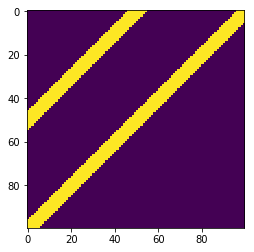

In [2]:
xv=np.zeros((100,100))
for i in range(100):
    for j in range(100):
        if (abs((i+j)-100)<5) or (abs((i+j)-50)<5):
            xv[i,j]=1
image=xv
plt.imshow(xv)

/anaconda3/envs/keras/lib/python3.6/site-packages/skimage/transform/radon_transform.py:63: UserWarning: Radon transform: image must be zero outside the reconstruction circle
  warn('Radon transform: image must be zero outside the '


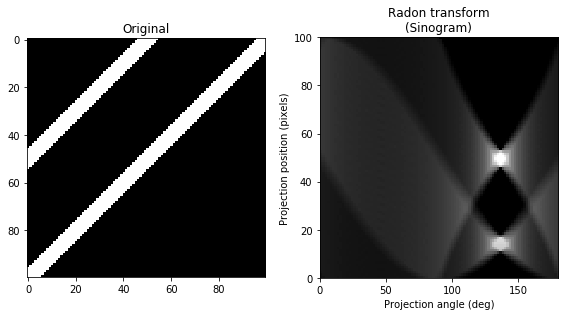

In [3]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4.5))

ax1.set_title("Original")
ax1.imshow(image, cmap=plt.cm.Greys_r)

theta = np.linspace(0., 180., max(image.shape), endpoint=False)
sinogram = radon(image, theta=theta, circle=True)
ax2.set_title("Radon transform\n(Sinogram)")
ax2.set_xlabel("Projection angle (deg)")
ax2.set_ylabel("Projection position (pixels)")
ax2.imshow(sinogram, cmap=plt.cm.Greys_r,
           extent=(0, 180, 0, sinogram.shape[0]), aspect='auto')

fig.tight_layout()
plt.show()

We can identify the location and angle of the lines.

## cloud

In [4]:
path='/Users/mgao1/Data/cloud/ShipTracks.jpg'
#image origin: https://en.wikipedia.org/wiki/Ship_tracks#/media/File:ShipTracks.jpg

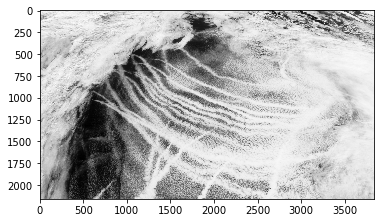

In [46]:
image = imread(path, as_gray=True)
image = rescale(image, scale=0.4, mode='reflect', multichannel=False)

plt.imshow(image, cmap=plt.cm.Greys_r)

(array([ 344022.,  427215.,  365549.,  439245.,  589808.,  688867.,
        1202122., 1755768., 2327445.,  154359.]),
 array([0.0633109 , 0.15246417, 0.24161745, 0.33077072, 0.419924  ,
        0.50907728, 0.59823055, 0.68738383, 0.7765371 , 0.86569038,
        0.95484366]),
 <a list of 10 Patch objects>)

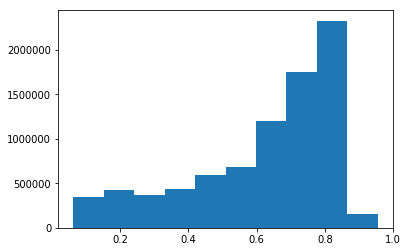

In [7]:
plt.hist(image.flatten())

### select a portion

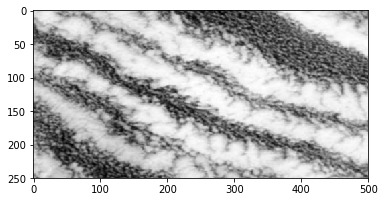

In [44]:
plt.imshow(image[1000:1250,1500:2000], cmap=plt.cm.gray)

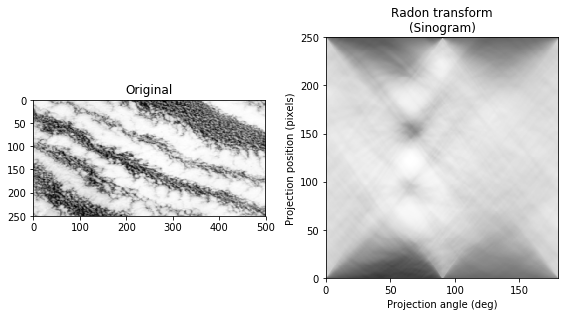

In [47]:
image1=image[1000:1250,1500:2000]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4.5))

ax1.set_title("Original")
ax1.imshow(image1, cmap=plt.cm.Greys_r)

theta = np.linspace(0., 180., max(image.shape), endpoint=False)
sinogram = radon(image1, theta=theta, circle=True)
ax2.set_title("Radon transform\n(Sinogram)")
ax2.set_xlabel("Projection angle (deg)")
ax2.set_ylabel("Projection position (pixels)")
ax2.imshow(sinogram, cmap=plt.cm.Greys_r,
           extent=(0, 180, 0, sinogram.shape[0]), aspect='auto')

fig.tight_layout()
plt.show()

The image is too bright, not easy to tell the feature from the right figure.

### find the edge

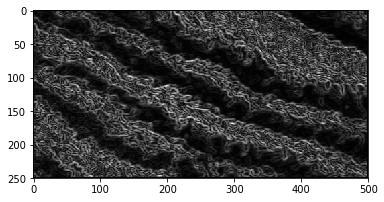

In [49]:
edge_sobel_s1 = sobel(image1)
plt.imshow(edge_sobel_s1, cmap=plt.cm.gray)

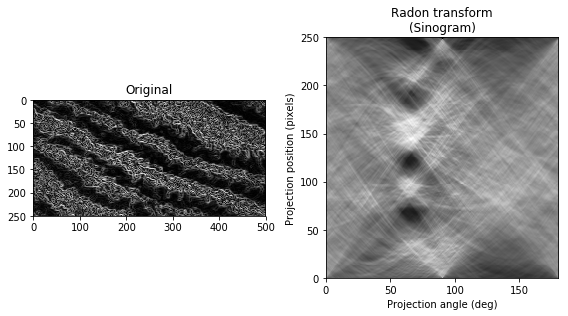

In [50]:
image1=edge_sobel_s1

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4.5))

ax1.set_title("Original")
ax1.imshow(image1, cmap=plt.cm.Greys_r)

theta = np.linspace(0., 180., max(image.shape), endpoint=False)
sinogram = radon(image1, theta=theta, circle=True)
ax2.set_title("Radon transform\n(Sinogram)")
ax2.set_xlabel("Projection angle (deg)")
ax2.set_ylabel("Projection position (pixels)")
ax2.imshow(sinogram, cmap=plt.cm.Greys_r,
           extent=(0, 180, 0, sinogram.shape[0]), aspect='auto')

fig.tight_layout()
plt.show()

Works better, the ship track is the dark points. 

## Work on the whole image

edge detection following:
    https://scikit-image.org/docs/dev/auto_examples/edges/plot_edge_filter.html
    
The original picture could be two large, it is better to separate it into small regions.

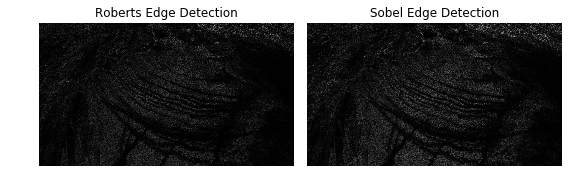

In [51]:
import numpy as np
import matplotlib.pyplot as plt

from skimage.data import camera
from skimage.filters import roberts, sobel, scharr, prewitt

image = imread(path, as_gray=True)
image = rescale(image, scale=0.4, mode='reflect', multichannel=False)

#image = camera()
edge_roberts = roberts(image)
edge_sobel = sobel(image)

fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True,
                       figsize=(8, 4))

ax[0].imshow(edge_roberts, cmap=plt.cm.gray)
ax[0].set_title('Roberts Edge Detection')

ax[1].imshow(edge_sobel, cmap=plt.cm.gray)
ax[1].set_title('Sobel Edge Detection')

for a in ax:
    a.axis('off')

plt.tight_layout()
plt.show()

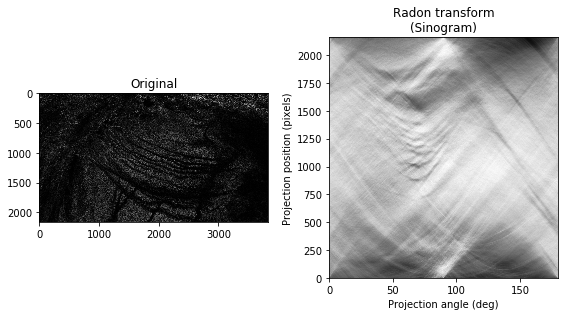

In [52]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4.5))

ax1.set_title("Original")

image=edge_sobel

ax1.imshow(image, cmap=plt.cm.Greys_r)

theta = np.linspace(0., 180., max(image.shape), endpoint=False)
sinogram = radon(image, theta=theta, circle=True)
ax2.set_title("Radon transform\n(Sinogram)")
ax2.set_xlabel("Projection angle (deg)")
ax2.set_ylabel("Projection position (pixels)")
ax2.imshow(sinogram, cmap=plt.cm.Greys_r,
           extent=(0, 180, 0, sinogram.shape[0]), aspect='auto')

fig.tight_layout()
plt.show()

## Conclusion

After the testing, we may work on the ship track detection following the following procedure:

1. edge detection

2. image segementation, divide into small regions

3. radon transformation

4. summarize the results